In [109]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
#Read data
imdb_reviews = pd.read_json('Dataset/IMDB_reviews.json', lines = True)
imdb_movies = pd.read_json('Dataset/IMDB_movie_details.json', lines = True)
imdb_titles = pd.read_table('Dataset/title.basics.tsv')

C:\Users\lakbo\AppData\Local\Temp\ipykernel_24620\2478719813.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  imdb_titles = pd.read_table('Dataset/title.basics.tsv')


In [111]:
imdb_titles.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [112]:
print(imdb_titles[imdb_titles['titleType'] == 'movie'])

             tconst titleType  \
8         tt0000009     movie   
144       tt0000147     movie   
498       tt0000502     movie   
570       tt0000574     movie   
587       tt0000591     movie   
...             ...       ...   
10676430  tt9916622     movie   
10676457  tt9916680     movie   
10676469  tt9916706     movie   
10676479  tt9916730     movie   
10676489  tt9916754     movie   

                                               primaryTitle  \
8                                                Miss Jerry   
144                           The Corbett-Fitzsimmons Fight   
498                                                Bohemios   
570                             The Story of the Kelly Gang   
587                                        The Prodigal Son   
...                                                     ...   
10676430        Rodolpho Teóphilo - O Legado de um Pioneiro   
10676457  De la ilusión al desconcierto: cine colombiano...   
10676469                            

In [113]:
imdb_movies.head()

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...


In [114]:
imdb_reviews.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"


In [115]:
#check for null values
print(imdb_movies.isnull().sum())
print(imdb_reviews.isnull().sum())

movie_id         0
plot_summary     0
duration         0
genre            0
rating           0
release_date     0
plot_synopsis    0
dtype: int64
review_date       0
movie_id          0
user_id           0
is_spoiler        0
review_text       0
rating            0
review_summary    0
dtype: int64


In [116]:
#split the genre column
imdb_movies['genre'] = imdb_movies['genre'].apply(lambda x: [genre.strip() for genre in x])

unique_genres = set(genre for sublist in imdb_movies['genre'] for genre in sublist)
for genre in unique_genres:
    imdb_movies[genre] = imdb_movies['genre'].apply(lambda x: int(genre in x))

#Remove original genre column
imdb_movies = imdb_movies.drop(columns=['genre'])


In [117]:
imdb_movies.head()

,movie_id,plot_summary,duration,rating,release_date,plot_synopsis,Sci-Fi,Film-Noir,Romance,Biography,...,Horror,Western,Fantasy,Musical,Action,Mystery,Family,Sport,War,Drama
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in...",0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,6.6,2013-11-01,Four boys around the age of 10 are friends in ...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,6.7,2002-04-11,,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [118]:
print(imdb_movies.columns)

Index(['movie_id', 'plot_summary', 'duration', 'rating', 'release_date',
       'plot_synopsis', 'Sci-Fi', 'Film-Noir', 'Romance', 'Biography', 'Music',
       'Comedy', 'History', 'Animation', 'Adventure', 'Crime', 'Thriller',
       'Horror', 'Western', 'Fantasy', 'Musical', 'Action', 'Mystery',
       'Family', 'Sport', 'War', 'Drama'],
      dtype='object')


In [119]:
#Number of genre
genre_counts = imdb_movies.iloc[:, 7:].sum()
genre_counts_sorted = genre_counts.sort_values(ascending=False)
print(genre_counts_sorted)

Drama        799
Comedy       525
Action       438
Adventure    433
Crime        302
Romance      237
Thriller     233
Fantasy      178
Mystery      161
Family       155
Horror       116
Biography    101
Animation     84
History       58
Music         34
Sport         30
War           25
Musical       12
Western       10
Film-Noir      6
dtype: int64


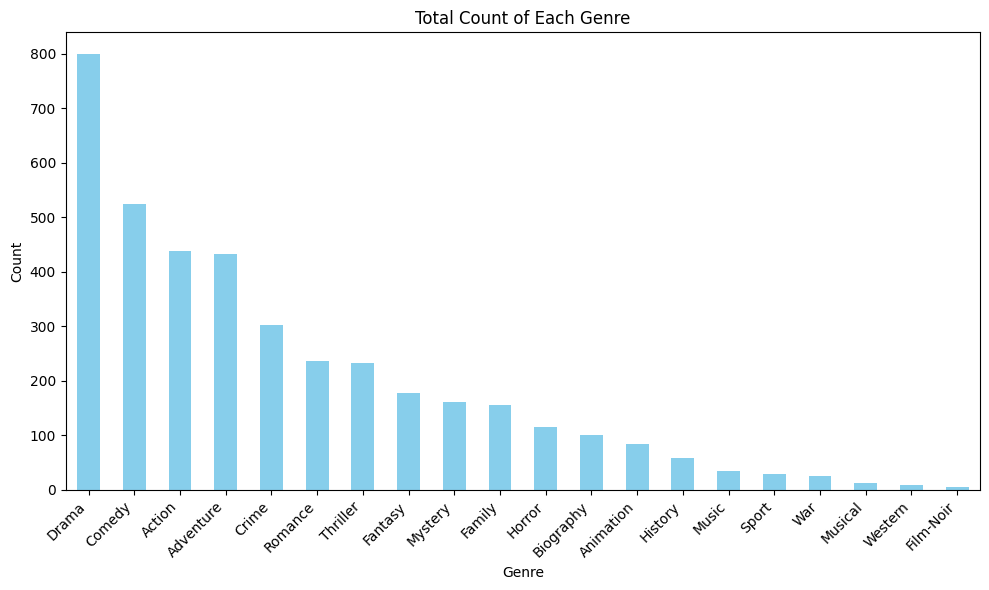

In [120]:

# Plot the total count of each genre
plt.figure(figsize=(10, 6))
genre_counts_sorted.plot(kind='bar', color='skyblue')
plt.title('Total Count of Each Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [121]:
imdb_movies_with_titles = imdb_movies.merge(imdb_titles[['tconst', 'primaryTitle']], left_on='movie_id', right_on='tconst', how='left')
imdb_movies_with_titles.drop(columns=['tconst'], inplace=True)
imdb_movies_with_titles.rename(columns={'primaryTitle': 'movie_title'}, inplace=True)
imdb_movies_with_titles['movie_id'], imdb_movies_with_titles['movie_title'] = imdb_movies_with_titles['movie_title'], imdb_movies_with_titles['movie_id']
imdb_movies_with_titles.rename(columns={'movie_id': 'movie_title', 'movie_title': 'movie_id'}, inplace=True)

In [122]:
imdb_movies_with_titles.head()

,movie_title,plot_summary,duration,rating,release_date,plot_synopsis,Sci-Fi,Film-Noir,Romance,Biography,...,Western,Fantasy,Musical,Action,Mystery,Family,Sport,War,Drama,movie_id
0,Patriot Games,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in...",0,0,0,0,...,0,0,0,1,0,0,0,0,0,tt0105112
1,Last Vegas,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,6.6,2013-11-01,Four boys around the age of 10 are friends in ...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,tt1204975
2,Wet Hot American Summer,"The setting is Camp Firewood, the year 1981. I...",1h 37min,6.7,2002-04-11,,0,0,1,0,...,0,0,0,0,0,0,0,0,0,tt0243655
3,The Treasure of the Sierra Madre,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...,0,0,0,0,...,1,0,0,0,0,0,0,0,1,tt0040897
4,Election,Tracy Flick is running unopposed for this year...,1h 43min,7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...,0,0,1,0,...,0,0,0,0,0,0,0,0,1,tt0126886


In [123]:
print(imdb_movies_with_titles.isnull().sum())

movie_title      2
plot_summary     0
duration         0
rating           0
release_date     0
plot_synopsis    0
Sci-Fi           0
Film-Noir        0
Romance          0
Biography        0
Music            0
Comedy           0
History          0
Animation        0
Adventure        0
Crime            0
Thriller         0
Horror           0
Western          0
Fantasy          0
Musical          0
Action           0
Mystery          0
Family           0
Sport            0
War              0
Drama            0
movie_id         0
dtype: int64


In [124]:
null_rows = imdb_movies_with_titles[imdb_movies_with_titles.isnull().any(axis=1)]

# Display rows containing null values
print(null_rows)

     movie_title                                       plot_summary  duration  \
1570         NaN  For a while now, beautiful 24-year-old Diana B...  1h 33min   
1571         NaN  The marriage of David Burgess, a senior execut...  1h 32min   

      rating release_date plot_synopsis  Sci-Fi  Film-Noir  Romance  \
1570     5.3   1992-02-21                     0          0        0   
1571     4.0   1999-01-29                     0          0        0   

      Biography  ...  Western  Fantasy  Musical  Action  Mystery  Family  \
1570          0  ...        0        0        0       0        0       0   
1571          0  ...        0        0        0       0        0       0   

      Sport  War  Drama    movie_id  
1570      0    0      1  tt0104014/  
1571      0    0      1  tt0114142/  

[2 rows x 28 columns]


In [129]:
#drop movie id that could map to a title
imdb_movies_with_titles.dropna(inplace=True)

In [130]:
imdb_movies_with_titles

,movie_title,plot_summary,duration,rating,release_date,plot_synopsis,Sci-Fi,Film-Noir,Romance,Biography,...,Western,Fantasy,Musical,Action,Mystery,Family,Sport,War,Drama,movie_id
0,Patriot Games,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in...",0,0,0,0,...,0,0,0,1,0,0,0,0,0,tt0105112
1,Last Vegas,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,6.6,2013-11-01,Four boys around the age of 10 are friends in ...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,tt1204975
2,Wet Hot American Summer,"The setting is Camp Firewood, the year 1981. I...",1h 37min,6.7,2002-04-11,,0,0,1,0,...,0,0,0,0,0,0,0,0,0,tt0243655
3,The Treasure of the Sierra Madre,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...,0,0,0,0,...,1,0,0,0,0,0,0,0,1,tt0040897
4,Election,Tracy Flick is running unopposed for this year...,1h 43min,7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...,0,0,1,0,...,0,0,0,0,0,0,0,0,1,tt0126886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,About a Boy,Twelve year old Marcus Brewer lives with his c...,1h 41min,7.1,2002-05-17,Will Freeman (Hugh Grant) is a 38-year-old bac...,0,0,1,0,...,0,0,0,0,0,0,0,0,1,tt0276751
1566,Dirk Gently's Holistic Detective Agency,Centers on the titular holistic detective who ...,1h,8.4,2017-04-01,,1,0,0,0,...,0,0,0,0,1,0,0,0,0,tt4047038
1567,The Butterfly Effect,Evan Treborn grows up in a small town with his...,1h 53min,7.7,2004-01-23,"In the year 1998, Evan Treborn (Ashton Kutcher...",1,0,0,0,...,0,0,0,0,0,0,0,0,0,tt0289879
1568,Shame,Brandon is a 30-something man living in New Yo...,1h 41min,7.2,2012-01-13,"Brandon (Michael Fassbender) is a successful, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,1,tt1723811
